<a href="https://colab.research.google.com/github/mileribeiro/banking-customer-churn/blob/main/banking-customer-churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

- Conjunto de dados: `Banking Customers Churn`
- Cientista de dados: Milena Vasconcelos Ribeiro (eng.milenaribeiro@gmail.com)

---

# Preparação

- Carregamento de bibliotecas
- Configuração de estilos dos gráficos
- Leitura do conjunto de dados

In [ ]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
# @title API Kaggle - leitura do conjunto de dados
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devmilenaribeiro","key":"3424b6e8fa50654c222a62e354612e56"}'}

In [ ]:
# Instalador do pacote kaggle
!pip install kaggle -q

# Diretório onde o arquivo de configuração da API será armazenado
!mkdir -p ~/.kaggle

# Mover o arquivo kaggle.json para a pasta .kaggle
!mv kaggle.json ~/.kaggle/

# Definir permissões garantindo que apenas o usuário atual possa acessá-lo
!chmod 600 ~/.kaggle/kaggle.json

# Usar o comando da API do kaggle para baixar o dataset
!kaggle datasets download -d saurabhbadole/bank-customer-churn-prediction-dataset

# Descompactar o arquivo ZIP do dataset para a pasta 'bunking_data'
!unzip bank-customer-churn-prediction-dataset.zip -d banking_data

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
Archive:  bank-customer-churn-prediction-dataset.zip
  inflating: banking_data/Churn_Modelling.csv  


In [ ]:
df = pd.read_csv("/content/banking_data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informações das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Últimas linhas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Informações das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Quantidade de valores únicos

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
# @title Dados faltantes (percentual)
round((df.isna()).sum()/df.shape[0]*100,2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


# Características do Dataset

---
A partir das informações inicias, podemos dizer que:

- O conjunto de dados tem 10.000 unidades amostrais com 14 variáveis
- Classificação das variáveis:
  - Qualitativa nominais: `Surname`, `Geography`, `Gender`, `HasCrCard`, `IsActiveMember` e `Exited`
  - Qualitativa ordinais:
  - Quantitativa discreta: `RowNumber`, `CustomerId`, `Age`, `Tenure` e `NumOfProducts`,
  - Quantitativa contínua: `CreditScore`, `Balance` e `EstimatedSalary`

In [ ]:
# Converter as variávei qualitativas nominais binais do tipo int64 para category
var_binaria = ["HasCrCard", "IsActiveMember", "Exited"]
df[var_binaria]= df[var_binaria].astype("category")

In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "RowNumber",
        "descrição": "Número sequencial atribuído a cada linha no conjunto de dados",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },
    {
        "variavel": "CustomerId",
        "descrição": "Identificador exclusivo para cliente",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },
    {
        "variavel": "Surname",
        "descrição": "Sobrenome do cliente",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "CreditScore",
        "descrição": "A pontual de crédito do cliente",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "Geography",
        "descrição": "Localização geográfica do cliente",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "Gender",
        "descrição": "O gênero do cliente",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "Age",
        "descrição": "Idade do cliente",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },
    {
        "variavel": "Tenure",
        "descrição": "Número de anos que o cliente está no banco",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },
    {
        "variavel": "Balance",
        "descrição": "Saldo da conta do cliente",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "NumOfProducts",
        "descrição": "Número de produtos bancários que o cliente tem",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },
    {
        "variavel": "HasCrCard",
        "descrição": "Indica se o cliente possui um cartão de crédito",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "IsActiveMember",
        "descrição": "Indica se o cliente é um membro ativo",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "EstimatedSalary",
        "descrição": "O salário estimado do cliente",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "Exited",
        "descrição": "Indica se o cliente saiu do banco",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    }
])
df_dict

,variavel,descrição,tipo,subtipo
0,RowNumber,Número sequencial atribuído a cada linha no co...,Quantitativa,Discreta
1,CustomerId,Identificador exclusivo para cliente,Quantitativa,Discreta
2,Surname,Sobrenome do cliente,Qualitativa,Nominal
3,CreditScore,A pontual de crédito do cliente,Quantitativa,Contínua
4,Geography,Localização geográfica do cliente,Qualitativa,Nominal
5,Gender,O gênero do cliente,Qualitativa,Nominal
6,Age,Idade do cliente,Quantitativa,Discreta
7,Tenure,Número de anos que o cliente está no banco,Quantitativa,Discreta
8,Balance,Saldo da conta do cliente,Quantitativa,Contínua
9,NumOfProducts,Número de produtos bancários que o cliente tem,Quantitativa,Discreta


# Análise Univariada

In [ ]:
# @title Resumo Estatístico
display(Markdown("### Variáveis qualitativas"))
print(df.describe(include=['object', 'category']))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

       Surname Geography Gender  HasCrCard  IsActiveMember  Exited
count    10000     10000  10000      10000           10000   10000
unique    2932         3      2          2               2       2
top      Smith    France   Male          1               1       0
freq        32      5014   5457       7055            5151    7963


### Variáveis quantitativas

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000  
25%         0.000000  

---
Insights importantes:
  - `20%` dos clientes saíram do banco
  - O tempo máximo de permanência no banco é de `10 anos`
  - Mais da metade dos cliente estão ativos (52%) e são homens (55%)
  - `71%` dos clientes possuem cartão de crédito
  - O sobrenome mais comum é `Smith`
  - A maioria dos clientes são franceses


# Distribuição de variáveis

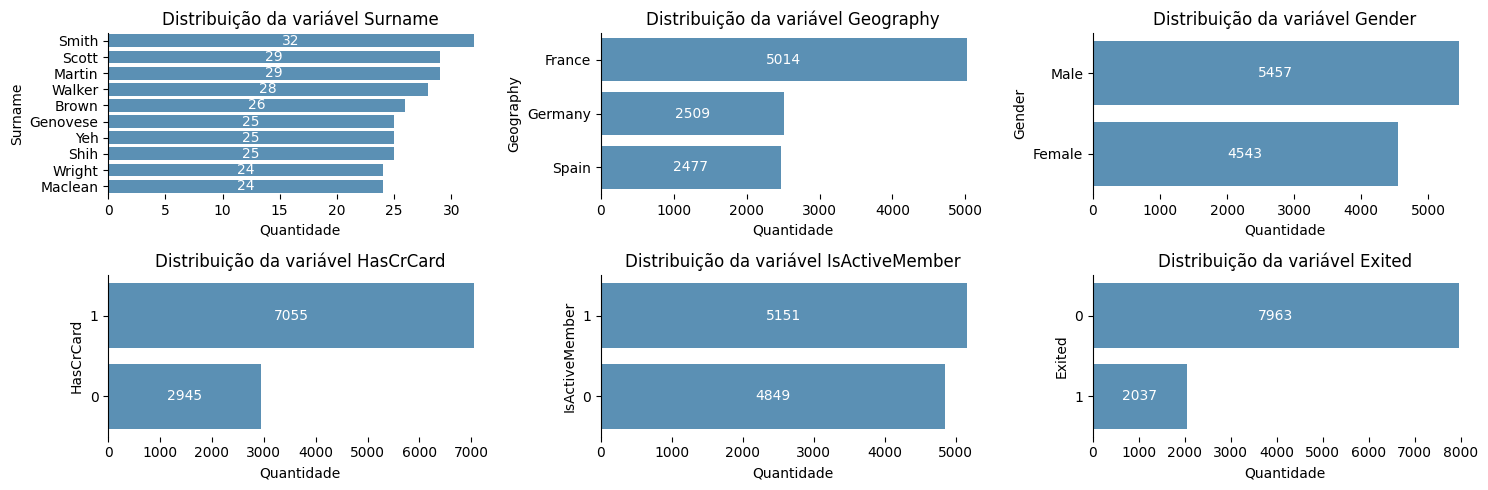

In [ ]:
# @title Variáveis Qualitativas

# Filtre as variáveis qualitativas
var_qualitativa = df_dict.query("tipo == 'Qualitativa'").variavel.to_list()

# Crie uma figura e uma grade (axes)
fig, axes = plt.subplots(figsize=(15, 5), ncols=3, nrows=2)
# Transforme a matriz 2x3 de eixos em um vetor 1D (facilita o uso no for)
axes = axes.flatten()

# Percorra cada variável e seu índice
for i, variavel in enumerate(var_qualitativa):
    # Considere os 10 sobrenomes mais frequentes (variável com muitos valores únicos)
    if variavel == "Surname":
        order = df['Surname'].value_counts().nlargest(10).index
    else:
        order = df[variavel].value_counts().index

    # Crie o gráfico de barras para cada variável garantindo que as variáveis apareçam ordenadas
    ax = sns.countplot(df, y=variavel, ax=axes[i], order=order, alpha=.8)
    # Mostre os valores dentro das barras com formação inteira (%d)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    # Esconda as bordas ("spines") inferior, superior e direira
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

[]

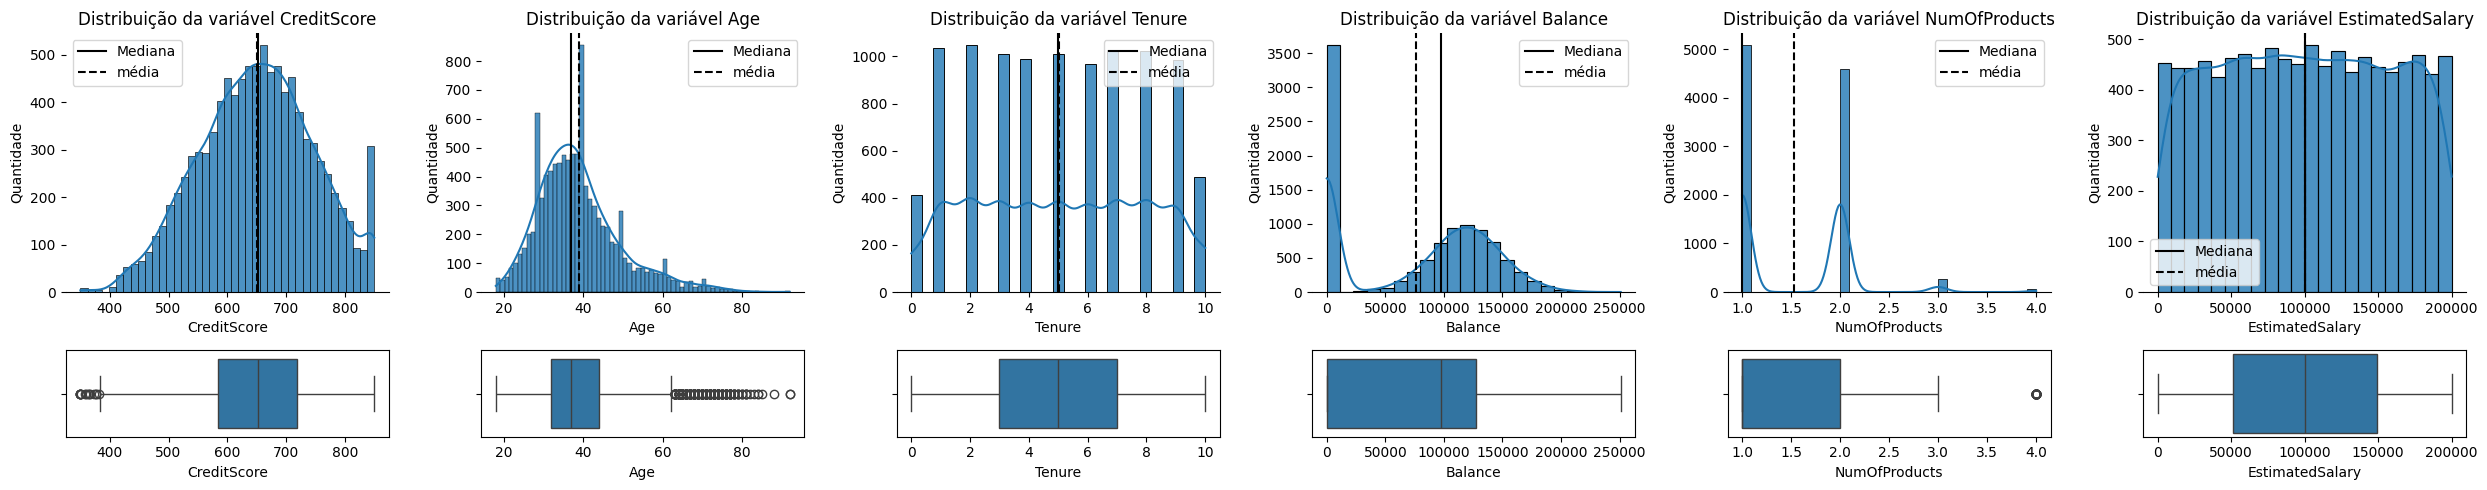

In [ ]:
# @title Variáveis Quantitativas

# Filtre as variáveis quantitativas
var_quantitativa = df_dict.query("tipo == 'Quantitativa'").variavel.to_list()

# Crie uma figura e uma grade (axes), sendo a primeira linha (histogramas) mais altas do que a segunda (boxplots)
fig, axes = plt.subplots(figsize=(25, 5), ncols=6, nrows=2, gridspec_kw={"height_ratios": [3,1]})

# Percorra cada variável e seu índice
for i, variavel in enumerate(var_quantitativa):
  if variavel in ["RowNumber", "CustomerId"]:
    continue
  else:
    order = df[variavel].value_counts().index
    # Crie um histograma com curva de densidade (Kde=True)
    ax = sns.histplot(data=df, x=variavel, ax=axes[0, i-2], kde=True, alpha=.8)
    # Adicione uma linha sólida para a mediana e uma linha tracejada para a média
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="média")
    # Defina o título do gráfico, o nome do eixo y e a legenda para média e mediana
    ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax.legend()
    # Defina a cor da linha inferior do gráfico (spine) como preta
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    # Esconda as bordas ("spines") inferior, superior e direira
    for side in ["left", "top", "right"]:
      ax.spines[side].set_visible(False)
    ax = sns.boxplot(data=df, x=variavel, ax=axes[1,i-2])

plt.tight_layout()
plt.plot()

---
Distribuição da variável `CreditScore`
- A maioria das pontuações está entre 600 e 700
- Existem clientes com pontuação inferior a 400, estes são considerados anomalias (outliers)
- A distribuição é assimétrica para a esquerda

Distribuição da variável `Age`
- A maioria das idades estão entre 30 e 40 anos
- Existem clientes com mais de 60 anos, estre são considerados anomalias (outliers)

Distribuição da variável `Tenure`
- A moda para esta variável é 5
- Os dados são simétricos

Distribuição da variável `Balance`
- 25% dos clientes tem no máximo R$ 0 reais de saldo na conta

Distribuição da variável `NumOfProducts`
- Metade dos clientes possuem apenas 1 produto bancário
- Existe clientes que possuem mais de 3 produtos, estes são considerados anomalias (outliers)

Distribuição da variável `EstimatedSalary`
- A maioria dos clientes possuem salário entre 50.000 reais e 150.000 reais
- Os dados são simétricos

---

# Análise Bivariada

### Relação entre variáveis quantitativas

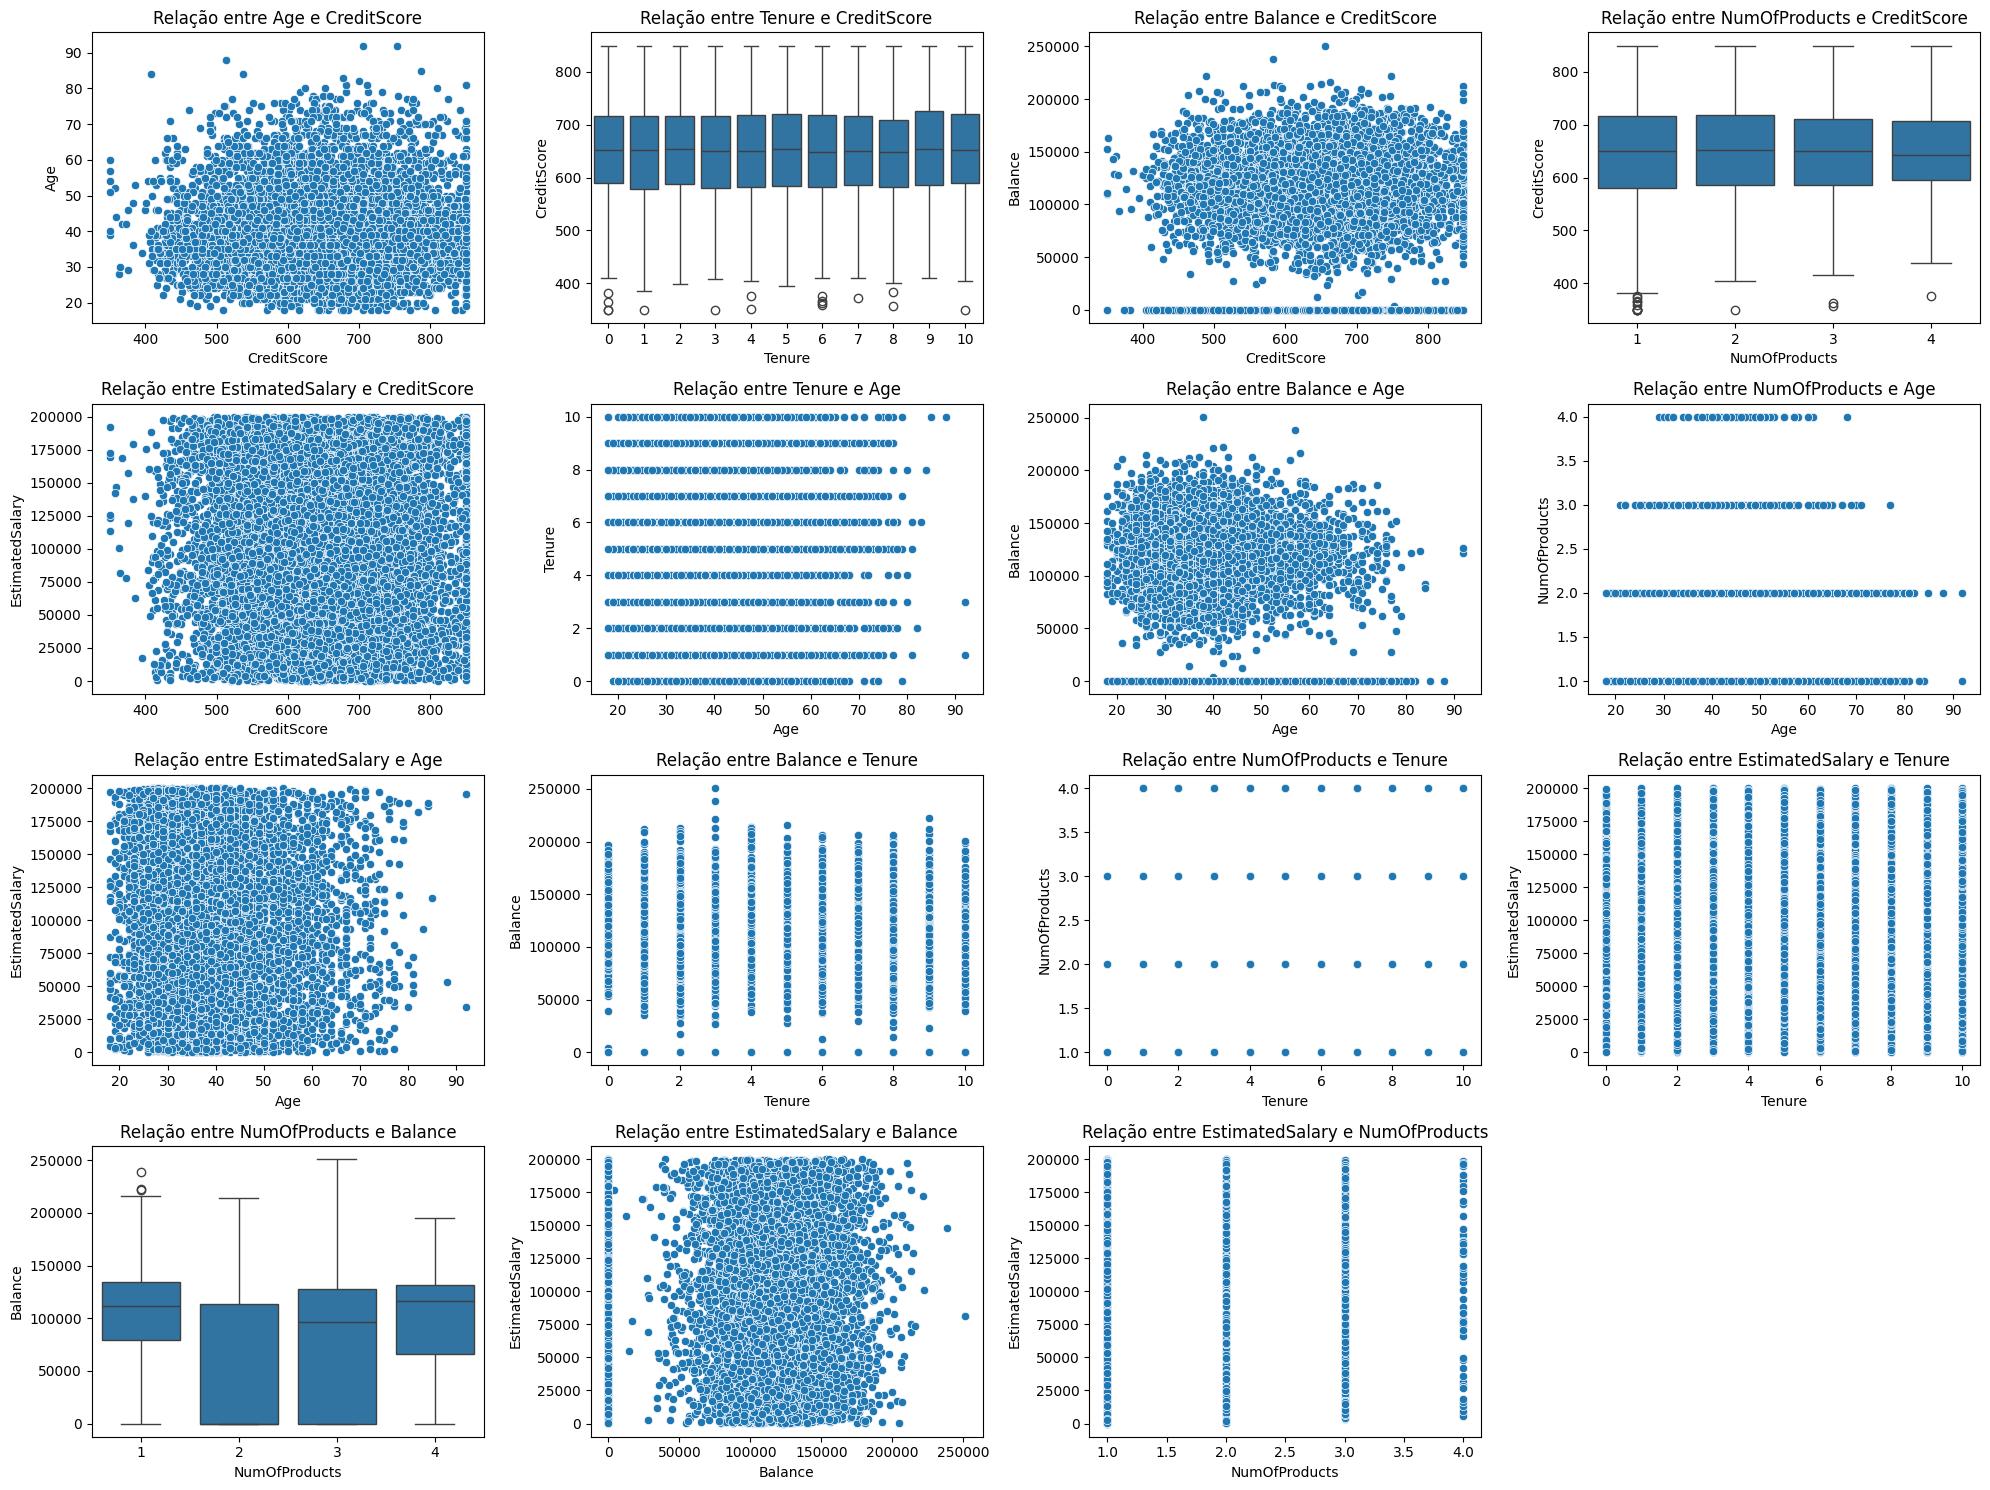

In [ ]:
# @title Comportamento par a par

# Garanta que 'RowNumber' e 'CustomerId' não apareçam nas combinações
quant_filtratada = []
for variavel in var_quantitativa:
  if variavel not in ["RowNumber", "CustomerId"]:
    quant_filtratada.append(variavel)
  else:
    continue

# Gere todas as combinações válidas de 2 em 2
combina_par = list(itertools.combinations(quant_filtratada, 2))

# Crie a grade de subplots com tamanho dinâmico baseado no número de combinações
n = len(combina_par)
ncols = 4
nrows = (n // ncols) + (n % ncols > 0)

fig, axes = plt.subplots(figsize=(5 * ncols, 15), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combina_par):
    # Busca subtipos para as variáveis
    var_1_var_2 = [var_1, var_2]
    subtipos = df_dict.query("variavel in @ @var_1_var_2").subtipo.to_list()

    if len(set(subtipos)) == 1:
        ax = sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        # Use boxplot se var_2 tiver poucos valores únicos
        if df[var_2].nunique() < 20:
            ax = sns.boxplot(data=df, x=var_2, y=var_1, ax=axes[i])
        else:
            ax = sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])

    ax.set(title=f"Relação entre {var_2} e {var_1}")

# Remova subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
Insights importantes:
- As variáveis quantitativas possuem pouca ou nenhuma correlação entre si, são independentes. Essa característica será útil para o aprendizado do modelo.
---

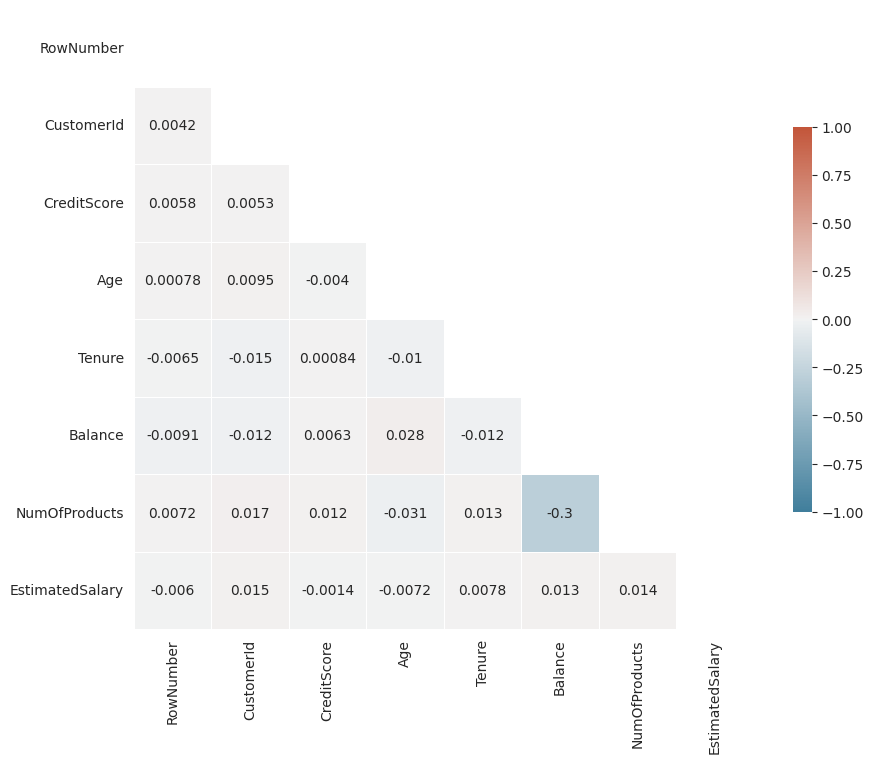

In [ ]:
# @title Correlação

# Garanta que somente colunas numéricas sejam consideradas
corr_linear = df.corr(numeric_only=True)

# Crie uma máscara booleana para esconder a parte superior da matriz (parte superior do triângulo)
mask = np.triu(np.ones_like(corr_linear, dtype=bool))
sns.set_style("white")

# Crie um eixo com dimensões (10x10), além de uma paleta de cores divergente (230= azul e 20=vermelho)
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crie um heatmap da matriz de correlação
chart = sns.heatmap(
    corr_linear, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=0.5, cbar_kws={"shrink": 0.5},
    ax=ax, annot=True
)

plt.show()

# Relação entre variáveis qualitativas

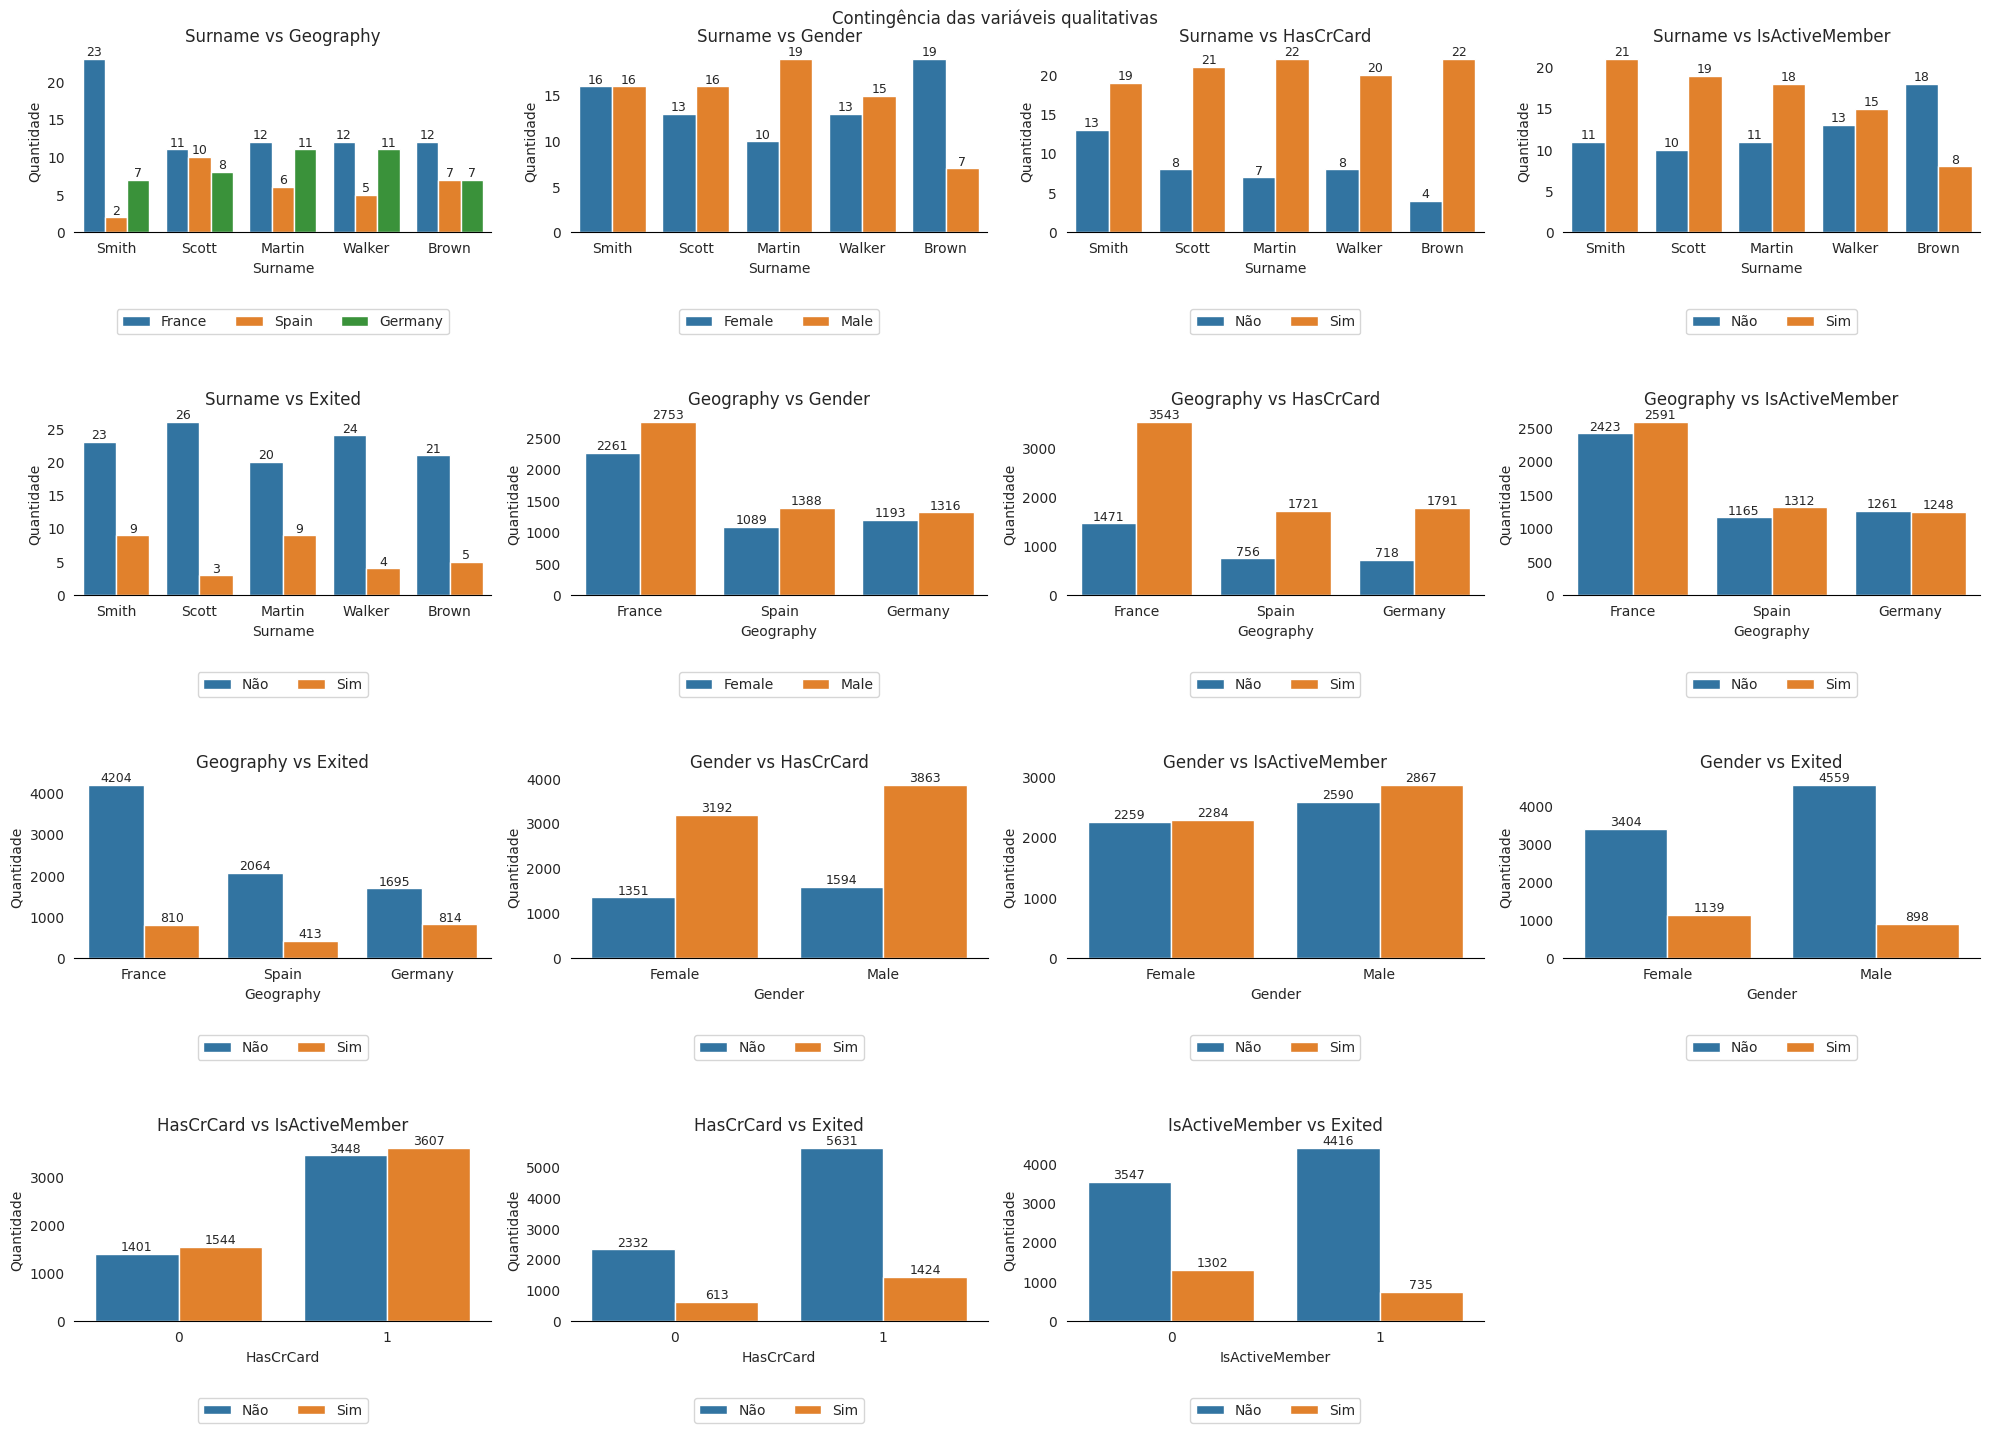

In [ ]:
# @title Contingência

# Gere todas as combinações válidas de 2 em 2
combina_cont = list(itertools.combinations(var_qualitativa, 2))

# Crie a grade de subplots com tamanho dinâmico baseado no número de combinações
n = len(combina_cont)
ncols = 4
nrows = (n // ncols) + (n % ncols > 0)
fig, axes = plt.subplots(figsize=(5 * ncols, 15), ncols=ncols, nrows=nrows, squeeze=False)

# Transforme a grade de eixos em uma lista linear para facilitar o loop
axes = axes.flatten()

# Percorra cada par de variável e seu índice
for i, (var_1, var_2) in enumerate(combina_cont):
  order = None
  hue_order = None
  # Considere os 10 sobrenomes mais frequentes (variável com muitos valores únicos)
  if var_1 == 'Surname':
    order = df['Surname'].value_counts().nlargest(5).index
  elif var_2 == 'Surname':
    order = df['Surname'].value_counts().nlargest(5).index
  # Gere o gráfico de barras
  ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order)
  # Adicione rótulos de valor em cima das barras
  for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=9)
  # Defina o título e o rótulo do eixo y para cada gráfico
  ax.set(
      title=f"{var_1} vs {var_2}",
      ylabel="Quantidade"
  )
  # Remova bordas superiores, direita e esquerda
  for side in ["left", "top", "right"]:
    ax.spines[side].set_visible(False)
  # Defina a borda inferior em preto
  ax.spines["bottom"].set_color("black")
  # Corrija a legenda se for variável binária
  if var_2 in ['Exited', 'IsActiveMember', 'HasCrCard']:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Não', 'Sim'])
  # Mova a legenda para a parte inferior do gráfico
  sns.move_legend(
      axes[i], "lower center",
      bbox_to_anchor=(.5, -.6), ncol=4, title=None,
  )

# Remova subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
Insights importantes:
- Algumas combinações entre as variáveis qualitativas não expressam informações relevantes, por esse motivo, foram pré-definidas combinações mais inteligentes e interpretável, objetivando evitar poluição visual.
---

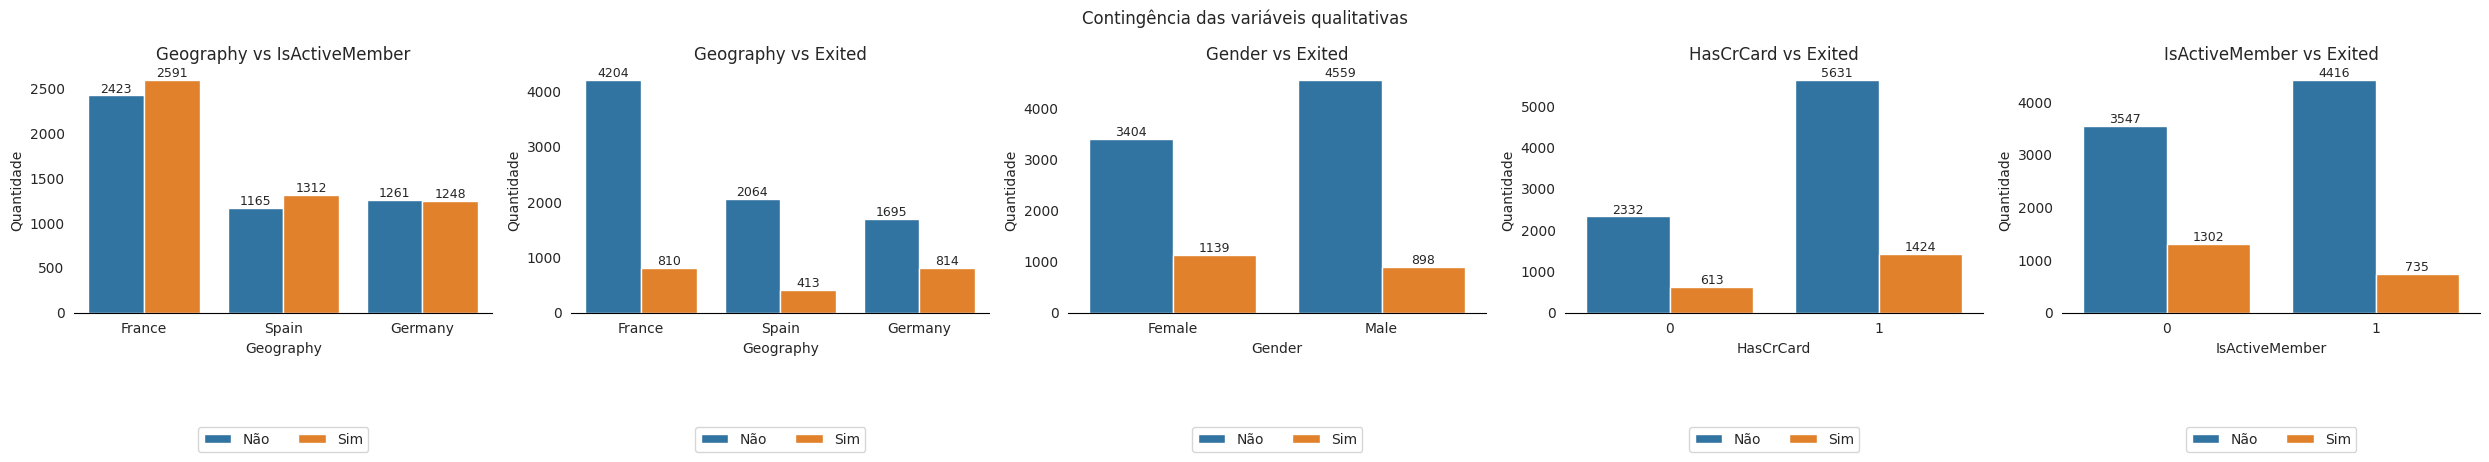

In [ ]:
# Lista de combinações desejadas
conbinacao_desejada = [
    ('Geography', 'IsActiveMember'),
    ('Geography', 'Exited'),
    ('Gender', 'Exited'),
    ('HasCrCard', 'Exited'),
    ('IsActiveMember', 'Exited')
]

# Crie a grade de subplots com tamanho dinâmico baseado no número de combinações
n = len(conbinacao_desejada)
ncols = 5
nrows = (n // ncols) + (n % ncols > 0)
fig, axes = plt.subplots(figsize=(5 * ncols, 6), ncols=ncols, nrows=nrows, squeeze=False)

# Transforme a grade de eixos em uma lista linear para facilitar o loop
axes = axes.flatten()

# Percorra cada par de variável e seu índice
for i, (var_1, var_2) in enumerate(conbinacao_desejada):
  ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order)
  # Adicione rótulo de valor em cima das barras
  for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=9)
  # Defina o título e o rótulo do eixo y para cada gráfico
  ax.set(
      title=f"{var_1} vs {var_2}",
      ylabel="Quantidade"
  )
  # Remova as bordas da superior, direita e esquerda
  for side in ["left", "top", "right"]:
    ax.spines[side].set_visible(False)
  # Defina a borda inferior em preto
  ax.spines["bottom"].set_color("black")
  # Corrija a legenda se for variável binária
  if var_2 in ['Exited', 'IsActiveMember', 'HasCrCard']:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Não', 'Sim'])
  # Mova a legenda para a parte inferior do gráfico
  sns.move_legend(
      axes[i], "lower center",
      bbox_to_anchor=(.5, -.6), ncol=4, title=None,
  )

# Remove subplots vazios (caso existam)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
Insights importantes:
- `Geography` vs `IsActiveMember`
    - A França é o pais com maior número de clientes ativos (2.591);
    - Na Alemanhã os clientes são quase que simetricamente divididos entre ativos e inativos.

- `Geography` vs `Exited`
    - A Alemanhã é o país que possui o maior chrun de clientes (32%), seguindo da Espanha (17%) e depois França (16%).

- `Gender` vs `Exited`
    - O chrun é mais comum em clientes do sexo feminino (25%)

- `HasCrCard` vs `Exited`
    - Ter cartão influência na permanência, a maioria dos clientes possuem cartão e permanecem no banco

- `IsActiveMember` vs `Exited`
    - Os clientes ativos (IsActiveMember = 1) e que saíram (Exited = 1) é o grupo mais preocupante para o banco, representando 735 clientes, porque são pessoas que tinham interação frequente (valor para o banco), mas mesmo assim foram perdidas.


### Relação entre variáveis quantitativas e qualitativas

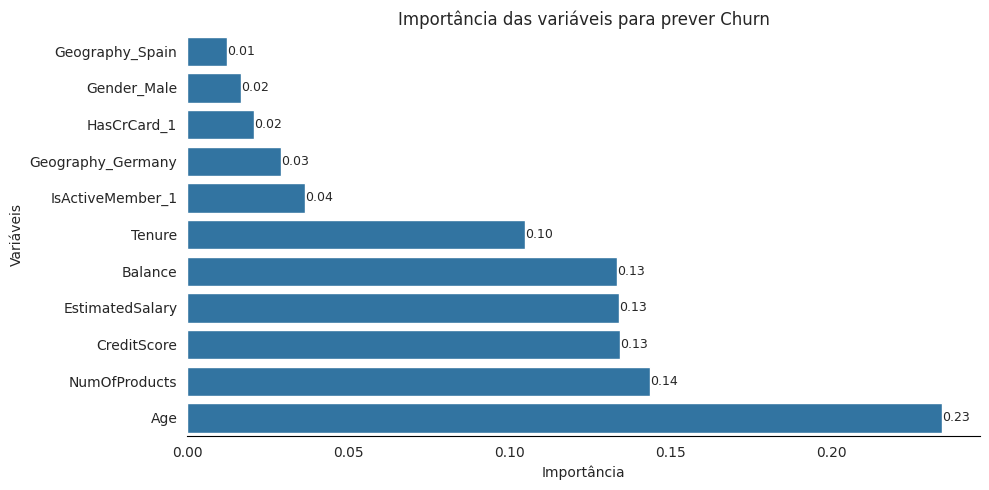

In [ ]:
# @title Distribuição relativa

# Garanta que 'RowNumber' e 'CustomerId' não apareçam nas combinações
quant_filtradas = []
for variavel in var_quantitativa:
  if variavel not in ["RowNumber", "CustomerId"]:
    quant_filtradas.append(variavel)
  else:
    continue

# Garanta que 'Surname' não apareçam nas combinações
quali_filtradas = []
for variavel in var_qualitativa:
  if variavel not in ["Surname", "Exited"]:
    quali_filtradas.append(variavel)
  else:
    continue

# Separar as features e o target
X = df[quant_filtradas + quali_filtradas]
y = df["Exited"]

# Pré-processador para lidar com valores faltantes e codificação
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), quant_filtradas),
        ("cat", OneHotEncoder(drop="first"), quali_filtradas)
    ]
)

# Pipeline com pré-processamento + modelo
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", ExtraTreesClassifier(n_estimators=100, random_state=42))
])

# Treinamento
model.fit(X, y)

# Obter nomes das features após o OneHotEncoder
encoded_cat = model.named_steps["preprocessor"].named_transformers_["cat"]\
                  .get_feature_names_out(quali_filtradas)
all_feature_names = quant_filtradas + list(encoded_cat)

# Obter importâncias
importances = model.named_steps["classifier"].feature_importances_
feat_importances = pd.Series(importances, index=all_feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
for container in ax.containers:
  ax.bar_label(container, fmt="%.2f", fontsize=9)
 # Remova as bordas da superior, direita e esquerda
for side in ["left", "top", "right"]:
  ax.spines[side].set_visible(False)
  # Defina a borda inferior em preto
  ax.spines["bottom"].set_color("black")

plt.title("Importância das variáveis para prever Churn")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()



---
Insights importantes:
- A idade é a variável que mais influência no churn
---